# Project: Investigate a IMDB movie database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, I load in the data, check for cleanliness, and then trim and clean dataset for analysis. 

### General Properties

In [2]:
# Load  data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# reading one record from the csv file to understand the data
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# to understand the data types and no of rows & columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Removing un-necessary columns
del_columns = ['imdb_id','homepage','tagline','keywords','overview','vote_average','vote_count']
df.drop(del_columns, axis=1, inplace=True)

In [6]:
# reading one record to ensure the columns from the above step are deleted
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09


### Data Cleaning (Replace this with more specific notes!)

First I like to remove duplicate rows if any.  Then, I will fix the dateformats so plots become easy.  

In [7]:
#To find Duplicated data
sum(df.duplicated())

1

In [8]:
#delete duplicated data
df.drop_duplicates(inplace=True)


In [9]:
#check if duplicated rows are gone
sum(df.duplicated())

0

In [10]:
# Changing date format from object
df.release_date = pd.to_datetime(df['release_date'])
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.379999e+08,1.392446e+09


In [11]:
#confirm the data type change for date
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 1.2+ MB


In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
# Runtime, budget and revenue has zero values and replace zero values with NaN so those rows can be deleted
df['runtime'] = df['runtime'].replace(0, np.NaN)
df['budget'] = df['budget'].replace(0,np.NaN)
df['revenue'] = df['revenue'].replace(0,np.NaN)

In [14]:
df.describe()

,id,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,5.169000e+03,4.849000e+03,10834.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,102.363855,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.890441e+07,1.620801e+08,30.948225,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,6.000000e+06,7.732325e+06,90.000000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,1.700000e+07,3.185308e+07,99.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,4.000000e+07,9.996575e+07,112.000000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000,4.250000e+08,2.827124e+09


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10834 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2), object(5)
memory usage: 1.2+ MB


In [16]:
#removing rows where revenue, budget and runtime is NaN
df.dropna(subset=['revenue', 'budget','runtime'],inplace=True)

In [17]:
#confirm that no of rows are now lower after the above clean up
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
budget                  3854 non-null float64
revenue                 3854 non-null float64
original_title          3854 non-null object
cast                    3850 non-null object
director                3853 non-null object
runtime                 3854 non-null float64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null datetime64[ns]
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2), object(5)
memory usage: 451.6+ KB


In [57]:
#Find percentage of records deleted because of missing values
initial_no_of_rows = 10865
final_no_of_rows = 3854

print('{0:.2f}%'.format(((initial_no_of_rows-final_no_of_rows) / initial_no_of_rows * 100)))


64.53%


In [58]:
#Since we removed 65% of rows, this can limit our confidence in conclusions

In [18]:
# to fing out the null values in other columns
df.isna().sum()
#I see that cast, director and production companies have null values and I will ingnore them for now

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
release_date             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis 1



### What kinds of properties are associated with movies that have high revenues?

In [19]:
# I have taken adjusted values for all calculations to account for inflation
# using describe to understand the revenue spread
df['revenue_adj'].describe()

count    3.854000e+03
mean     1.370647e+08
std      2.161114e+08
min      2.370705e+00
25%      1.835735e+07
50%      6.173068e+07
75%      1.632577e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [20]:
#Calculate the profit by subsstracting budget from revenue
df.insert(2, 'profit_adj', df['revenue_adj'] - df['budget_adj'])

In [21]:
#Confirm that we are able to insert profit 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 15 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
profit_adj              3854 non-null float64
budget                  3854 non-null float64
revenue                 3854 non-null float64
original_title          3854 non-null object
cast                    3850 non-null object
director                3853 non-null object
runtime                 3854 non-null float64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null datetime64[ns]
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(5)
memory usage: 481.8+ KB


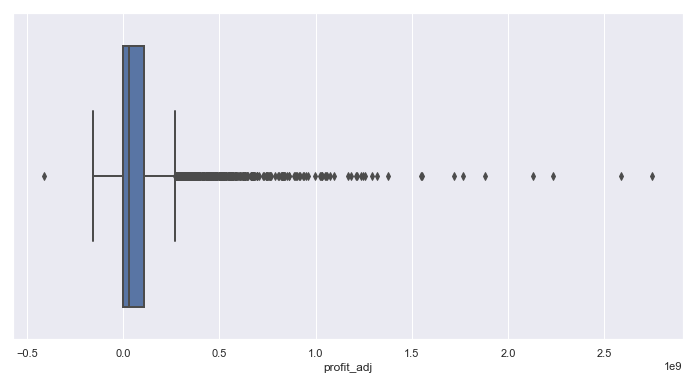

In [32]:
#shape of adjusted profit

#using seaborn to plot
#plotting box plot
sns.boxplot(df['profit_adj'], linewidth = 2)
#showing the plot
plt.show()

In [ ]:
#The shape of adjusted profit is right skewed with some movies making huge profits compared to most movies

In [22]:
#What is the most profitable movie?  
df.sort_values('profit_adj').tail(1)


,id,popularity,profit_adj,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
1329,11,12.037933,2.750137e+09,11000000.0,775398007.0,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,1977,3.957559e+07,2.789712e+09


In [33]:
#The most profitable movie is Star Wars

In [23]:
#What is the movie with most gross revenue(adjusted)?
df.sort_values('revenue_adj').tail(1)

,id,popularity,profit_adj,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
1386,19995,9.432768,2.586237e+09,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,2009,2.408869e+08,2.827124e+09


In [34]:
#The movie with most gross revenue is Avatar

In [24]:
#What is the most budgeted movie?
df.sort_values('budget_adj').tail(1)

,id,popularity,profit_adj,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
2244,46528,0.25054,-413912431.0,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,2010,425000000.0,11087569.0


In [35]:
#The movie with the most budget is "The Warrior's Way"

Text(0, 0.5, 'Profit')

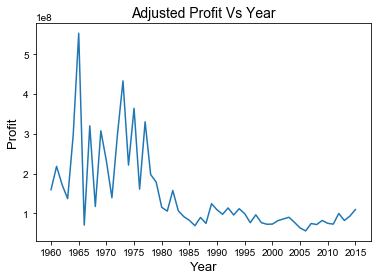

In [25]:
#average profit for movie trending over the years
df.groupby('release_year').mean()['profit_adj'].plot(xticks = np.arange(1960,2016,5))

#setup the title of the figure
plt.title("Adjusted Profit Vs Year",fontsize = 14)
sns.set(rc={'figure.figsize':(12,6)})

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Profit',fontsize = 13)



In [ ]:
#The adjust profit of the movies has reduced in the last two decades compared to middle of 20th century.  However, the recent uptick in the profit is a positive news for the movie industry

Text(0, 0.5, 'Budget')

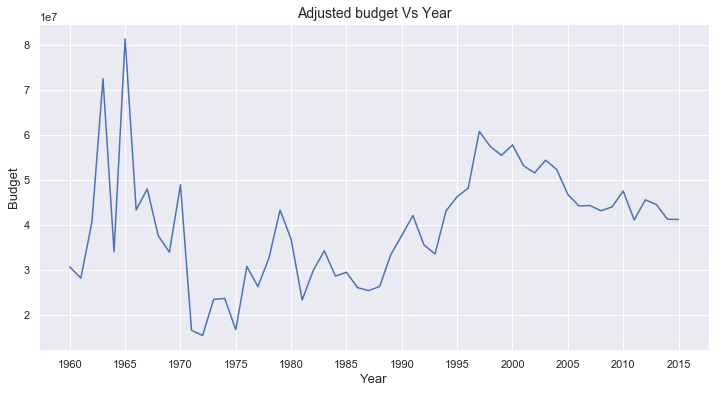

In [36]:
#average spend on movies i.e. budget trend over the years
df.groupby('release_year').mean()['budget_adj'].plot(xticks = np.arange(1960,2016,5))
#setup the title of the figure
plt.title("Adjusted budget Vs Year",fontsize = 14)
sns.set(rc={'figure.figsize':(12,6)})

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Budget',fontsize = 13)

In [ ]:
#The average budget of the movies is seeing downward trend with a peak in late 90's.  It also appears that adjusted average budget in middle of 20th century is high.

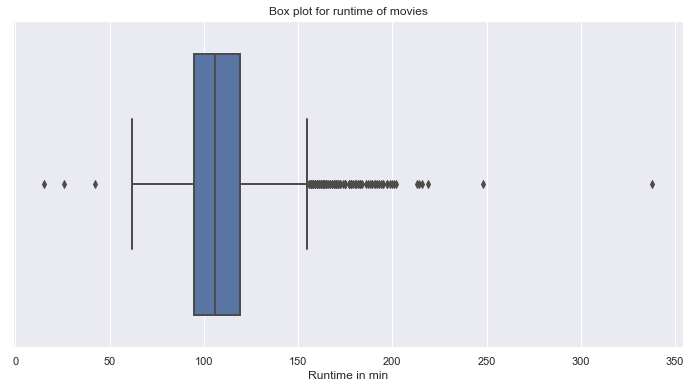

In [47]:
#shape of runtime movies

#using seaborn to plot
#plotting box plot
ax = sns.boxplot(df['runtime'], linewidth = 2)
ax.set_title('Box plot for runtime of movies')
ax.set_xlabel('Runtime in min')
#showing the plot
plt.show()

In [30]:
#The box plot of runtime of movies shows the median run time is close to ~110 min with outlier over 300 min.  Majority of the movies are under ~150 min duration

Text(0, 0.5, 'Runtime in min')

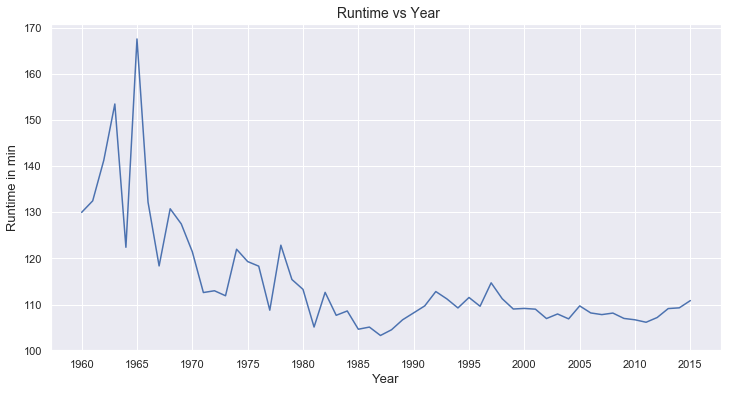

In [44]:
#average runtime trend over the years
df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))
#setup the title of the figure
plt.title(" Runtime vs Year",fontsize = 14)
sns.set(rc={'figure.figsize':(12,6)})

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime in min',fontsize = 13)

In [37]:
#The average runtime of movies has reduced over years. 

In [38]:
df.corr()

,id,popularity,profit_adj,budget,revenue,runtime,release_year,budget_adj,revenue_adj
id,1.000000,0.188878,-0.069675,-0.027449,-0.003206,-0.035688,0.489926,-0.124035,-0.088287
popularity,0.188878,1.000000,0.516868,0.446987,0.615535,0.215092,0.173278,0.399356,0.546959
profit_adj,-0.069675,0.516868,1.000000,0.372772,0.851366,0.235249,-0.132202,0.404344,0.981854
budget,-0.027449,0.446987,0.372772,1.000000,0.688556,0.260977,0.268040,0.958520,0.533498
revenue,-0.003206,0.615535,0.851366,0.688556,1.000000,0.250298,0.139140,0.657567,0.900882
runtime,-0.035688,0.215092,0.235249,0.260977,0.250298,1.000000,-0.112453,0.333976,0.280505
release_year,0.489926,0.173278,-0.132202,0.268040,0.139140,-0.112453,1.000000,0.075103,-0.103147
budget_adj,-0.124035,0.399356,0.404344,0.958520,0.657567,0.333976,0.075103,1.000000,0.570451
revenue_adj,-0.088287,0.546959,0.981854,0.533498,0.900882,0.280505,-0.103147,0.570451,1.000000


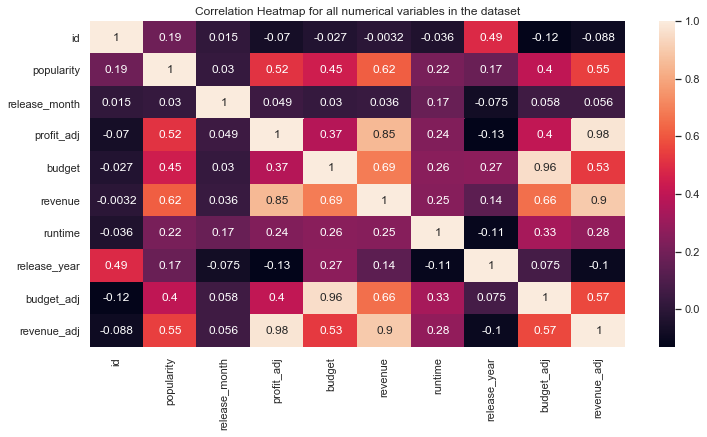

In [51]:
ax = sns.heatmap(df.corr(),annot = True);
ax.set_title('Correlation Heatmap for all numerical variables in the dataset');


### From above heat map, we can assess that popularity and revenues/profits are positively correlated.  Adjusted profits are reduced in the recent years. The movie industry may not making as much profit as it was making. Runtimes of the the movies has reduced over the years. Revenue and budgets are positively correlated means more the budget the more the revenue

In [40]:
#find out what is the profitable month to release a movie
df.insert(2, 'release_month', df['release_date'].dt.month)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 16 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
release_month           3854 non-null int64
profit_adj              3854 non-null float64
budget                  3854 non-null float64
revenue                 3854 non-null float64
original_title          3854 non-null object
cast                    3850 non-null object
director                3853 non-null object
runtime                 3854 non-null float64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null datetime64[ns]
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(3), object(5)
memory usage: 511.9+ KB


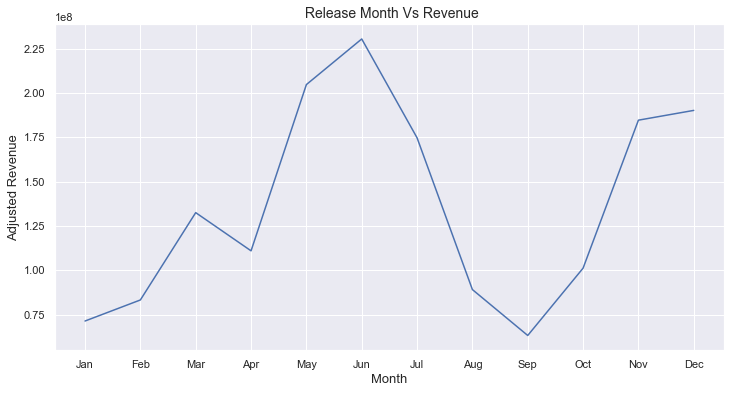

In [53]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df.groupby('release_month').mean()['revenue_adj'].plot(xticks = np.arange(1,13))
                #setup the title of the figure
plt.title(" Release Month Vs Revenue",fontsize = 14)
sns.set(rc={'figure.figsize':(12,6)})

#setup the x-label and y-label of the plot.
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Adjusted Revenue',fontsize = 13)
plt.xticks(np.arange(1,13), months);


In [ ]:
# months leading up to summmer holidays and winter holidays are high in generating movie revenue


### Which genres are most popular?

In [54]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

def split_data_count(column_name):
    #will take a column, and separate the string by '|'
    sp_data = df[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    sp_data = pd.Series(sp_data.split('|'))
    
    #this will us value in descending order df.groupby('release_year')
    count = sp_data.value_counts(ascending = False)
    
    return count

In [55]:
genre_count = split_data_count('genres')
genre_count.head(2)

Drama     1756
Comedy    1358
dtype: int64

In [62]:
# Drama is the top genre in the movies

<a id='conclusions'></a>
## Conclusions

1. The most profitable movie: Star Wars
2. The most revenue generating movie: Avatar
3. The most budgeted movie: The Warrior's Way
4. Adjusted profits are reduced in the recent years. The movie industry may not making as much profit as it was making. Runtimes of the the movies has reduced over the years
5. Months leading up to summmer holidays and winter holidays are high in generating movie revenue
6. Drama is the top genre in the movies   

## Limitations
 - Since we removed close to 65% of records in the cleaning phase, our conclusions are only based on remaining data.  While months leading up to holidays made more average revenue, doesn't mean that only timing is responsible for succuss of a movie